In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from ipywidgets import interact

In [2]:
data =pd.read_csv('updated_Agric_dataset.csv')

In [3]:
data.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
0,185,41,275,26.113153,85.141923,6.458674,85.029794,plantain
1,184,42,268,27.479102,85.335922,5.612016,81.519789,plantain
2,192,46,257,26.110585,83.224921,6.669468,76.193598,plantain
3,188,55,234,28.846636,83.335824,6.830547,60.756861,plantain
4,152,44,208,29.014083,86.117302,5.853407,75.523305,plantain


## performing EDA on the dataset !

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     3500 non-null   int64  
 1   Phosphorus   3500 non-null   int64  
 2   Potassium    3500 non-null   int64  
 3   temperature  3500 non-null   float64
 4   humidity     3500 non-null   float64
 5   ph           3500 non-null   float64
 6   rainfall     3500 non-null   float64
 7   label        3500 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 218.9+ KB


In [5]:
data.describe()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,82.126286,54.073429,80.985143,25.344947,70.969938,6.365678,122.287611
std,62.213992,45.113018,71.044949,4.876091,18.906241,0.684442,89.998936
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,31.000000,28.000000,25.000000,22.366162,61.781205,5.955711,65.885242
50%,74.000000,43.000000,47.000000,25.396502,73.261256,6.333639,95.246217
75%,121.000000,63.000000,152.000000,28.414823,84.843375,6.727345,143.124286
max,285.000000,279.000000,299.000000,43.675493,99.981876,9.935091,496.979333


In [6]:
data.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data['label'].value_counts().sort_index()

apple          100
banana         100
beans          100
blackgram      100
carrot         100
chickpea       100
coconut        100
coffee         100
corn           100
cotton         100
cucumber       100
ginger         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pawpaw         100
pepper         100
pigeonpeas     100
plantain       100
pomegranate    100
potato         100
rice           100
soyabeans      100
tomato         100
ugwu           100
watermelon     100
yam            100
Name: label, dtype: int64

In [8]:
crop=list(data['label'].unique())


In [9]:
print('Number of crops available:',len(data['label'].unique()))

Number of crops available: 35


In [10]:
crop

['plantain',
 'tomato',
 'pepper',
 'ugwu',
 'potato',
 'corn',
 'ginger',
 'rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee',
 'carrot',
 'soyabeans',
 'yam',
 'beans',
 'pawpaw',
 'cucumber']

In [11]:
# using interact to show the comparision between the conditions for the crops
x= data['label']
test1 = data.groupby(x).agg({'Nitrogen':['mean','max','min'],'Phosphorus':['mean','max','min'],
                             'Potassium':['mean','max','min'],'ph':['mean','max','min'],
                             'temperature':['mean','max','min'],'humidity':['mean','max','min'],
                             'rainfall':['mean','max','min']})

In [12]:
test1.head(35)

Nitrogen           Phosphorus           Potassium            \
                mean  max  min       mean  max  min      mean  max  min   
label                                                                     
apple          20.80   40    0     134.22  145  120    199.89  205  195   
banana        100.23  120   80      82.01   95   70     50.05   55   45   
beans          62.14   67   57      40.53   47   35     55.54   61   50   
blackgram      40.02   60   20      67.47   80   55     19.24   25   15   
carrot        112.51  139   80      38.42   49   30    191.95  199  185   
chickpea       40.09   60   20      67.79   80   55     79.92   85   75   
coconut        21.98   40    0      16.93   30    5     30.59   35   25   
coffee        101.20  120   80      28.74   40   15     29.94   35   25   
corn          135.75  149  120      70.18   79   60    174.12  199  150   
cotton        117.77  140  100      46.24   60   35     19.56   25   15   
cucumber      165.65  179  150     258.66  279  240    133.63  149  120   
ginger         79.51   99   60      24.15   29   20     49.02   59   40   
grapes         23.18   40    0     132.53  145  120    200.11  205  195   
jute           78.40  100   60      46.86   60   35     39.99   45   35   
kidneybeans    20.75   40    0      67.54   80   55     20.05   25   15   
lentil         18.77   40    0      68.36   80   55     19.41   25   15   
maize          77.76  100   60      48.44   60   35     19.79   25   15   
mango          20.07   40    0      27.18   40   15     29.92   35   25   
mothbeans      21.44   40    0      48.01   60   35     20.23   25   15   
mungbean       20.99   40    0      47.28   60   35     19.87   25   15   
muskmelon     100.32  120   80      17.72   30    5     50.08   55   45   
orange         19.58   40    0      16.55   30    5     10.01   15    5   
papaya         49.88   70   31      59.05   70   46     50.04   55   45   
pawpaw         35.76   38   33      33.61   35   32     34.02   36   32   
pepper        134.35  149  120      39.65   49   30    175.91  199  150   
pigeonpeas     20.73   40    0      67.73   80   55     20.29   25   15   
plantain      172.08  199  150      48.99   59   40    255.70  299  202   
pomegranate    18.87   40    0      18.75   30    5     40.21   45   35   
potato        125.69  149  100      24.82   29   20    175.30  199  150   
rice           79.89   99   60      47.58   60   35     39.87   45   35   
soyabeans     213.01  229  200      29.41   39   20     58.80   67   50   
tomato        133.83  149  120      49.37   59   40    136.02  149  120   
ugwu          124.60  148  100      39.54   49   30    174.01  199  151   
watermelon     99.42  120   80      17.00   30    5     50.22   55   45   
yam           267.40  285  250      21.26   26   17    161.18  171  150   

                   ph  ...           temperature                        \
                 mean  ...       min        mean        max        min   
label                  ...                                               
apple        5.929663  ...  5.514253   22.630942  23.996862  21.036527   
banana       5.983893  ...  5.505394   27.376798  29.908885  25.010185   
beans        5.976669  ...  5.504833   22.517747  29.995430  15.017628   
blackgram    7.133952  ...  6.500145   29.973340  34.946616  25.097374   
carrot       6.309830  ...  5.819396   19.872661  24.656955  15.001063   
chickpea     7.336957  ...  5.988993   18.872847  20.995022  17.024985   
coconut      5.976562  ...  5.501580   27.409892  29.869083  25.008724   
coffee       6.790308  ...  6.020947   25.540477  27.923744  23.059519   
corn         6.487843  ...  6.006857   25.099639  28.961079  21.063508   
cotton       6.912675  ...  5.801048   23.988958  25.992374  22.000851   
cucumber     6.409840  ...  6.004040   22.603952  26.838696  18.072369   
ginger       6.029875  ...  5.501532   32.698739  34.970354  30.007937   
grapes       6.025937  ...  5.510925   23.849575  4

In [13]:
# an interaction to display the suitable conditons needed for growth for each crop.
def info (crops=data['label'].unique()):
    x = data[data['label']==crops]
    
    def nitrogen(x):
        
        print("Statistics for Nitrogen")
        print("Minimum Nitrogen required:", x['Nitrogen'].min())
        print("Average Nitrogen required:", x['Nitrogen'].mean())
        print("Maximum Nitrogen required:", x['Nitrogen'].max())
        print("...........................................")
   
    
    def phosphorous (x):
        print("Statistics for Phosphorous")
        print("Minimum Phosphorous required:", x['Phosphorus'].min())
        print("Average Phosphorous required:", x['Phosphorus'].mean())
        print("Maximum Phosphorous required:", x['Phosphorus'].max())
       
    def potassium(x):
        print("Statistics for Pottasium")
        print("Minimum Pottasium required:", x['Potassium'].min())
        print("Average Pottasium required:", x['Potassium'].mean())
        print("Maximum Pottasium required:", x['Potassium'].max())
        print("...........................................")
        
    def temperature(x):
        print("Statistics for Temperature")
        print("Minimum Temperature required: {0:.2f}".format(x['temperature'].min()))
        print("Average Temperature required: {0:.2f}".format(x['temperature'].mean()))
        print("Maximum Temperature required: {0:.2f}".format(x['temperature'].max()))
        print("...........................................")
        
    def humidity(x): 
        print("Statistics for Humidity")
        print("Minimum Humidity required: {0:.2f}".format(x['humidity'].min()))
        print("Average Humidity required: {0:.2f}".format(x['humidity'].mean()))
        print("Maximum Humidity required: {0:.2f}".format(x['humidity'].max()))
        print("...........................................")
        
    def ph(x):    
        print("Statistics for PH")
        print("Minimum PH required: {0:.2f}".format(x['ph'].min()))
        print("Average PH required: {0:.2f}".format(x['ph'].mean()))
        print("Maximum PH required: {0:.2f}".format(x['ph'].max()))
        print("...........................................")
     
    def rainfall(x):
        print("Statistics for Rainfall")
        print("Minimum Rainfall required: {0:.2f}".format(x['rainfall'].min()))
        print("Average Rainfall required: {0:.2f}".format(x['rainfall'].mean()))
        print("Maximum Rainfall required: {0:.2f}".format(x['rainfall'].max()))
        
        
    phosphorous(x)
    nitrogen(x)
    potassium(x)
    rainfall(x)
    ph(x)
    humidity(x)
    temperature(x)

  

In [14]:
interact(info)

interactive(children=(Dropdown(description='crops', options=('plantain', 'tomato', 'pepper', 'ugwu', 'potato',…

<function __main__.info(crops=array(['plantain', 'tomato', 'pepper', 'ugwu', 'potato', 'corn', 'ginger',
       'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee',
       'carrot', 'soyabeans', 'yam', 'beans', 'pawpaw', 'cucumber'],
      dtype=object))>

In [15]:
# this would display the maximuma and minimum conditions needed for each crop to grow
@interact
def summary(crop = list(data['label'].unique())):
    x = data[data['label'] == crop]

    print("Statistics for ", crop)
    print(".................................................")
    print("The minimum to maximum Nitrogen required is {} to {}".format(x['Nitrogen'].min(), x['Nitrogen'].max()))
    print(".................................................")
    print("The minimum to maximum Phosphorus required is {} to {}".format(x['Phosphorus'].min(), x['Phosphorus'].max()))
    print(".................................................")
    print("The minimum to maximum Pottasium required is {} to {}".format(x['Potassium'].min(), x['Potassium'].max()))
    print(".................................................")
    print("The minimum to maximum Temperature required is {:.2f} to {:.2f}".format(x['temperature'].min(), x['temperature'].max()))
    print(".................................................")
    print("The minimum to maximum Humidity required is {:.2f} to {:.2f}".format(x['humidity'].min(), x['humidity'].max()))
    print(".................................................")
    print("The minimum to maximum Rainfall requird is {:.2f} to {:.2f}".format(x['rainfall'].min(), x['rainfall'].max()))


interactive(children=(Dropdown(description='crop', options=('plantain', 'tomato', 'pepper', 'ugwu', 'potato', …

## analysis visualization 

In [16]:
import matplotlib.pyplot as plt

In [47]:
# using barcharts to describe the relative level of condition for the individual crops

Text(0.5, 1.0, 'Nitrogen graph')

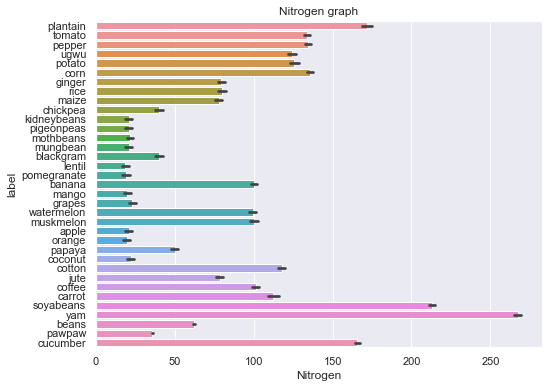

In [63]:

sns.barplot(data=data, x='Nitrogen',y='label')
sns.set(rc={'figure.figsize':(8.5,6.5)})
plt.title('Nitrogen graph')

Text(0.5, 1.0, 'Phosphorus graph')

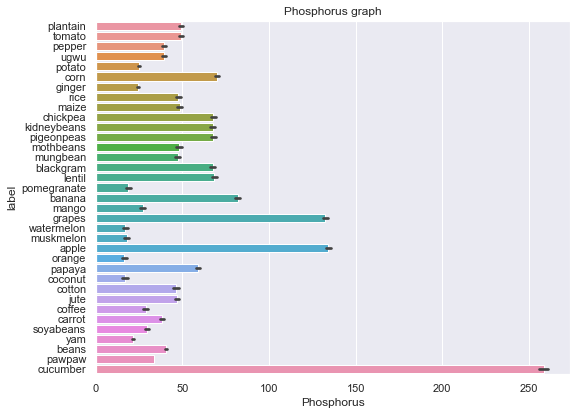

In [64]:
sns.barplot(data=data, x='Phosphorus',y='label')
sns.set(rc={'figure.figsize':(8.5,6.5)})
plt.title('Phosphorus graph')

Text(0.5, 1.0, 'Potassium graph')

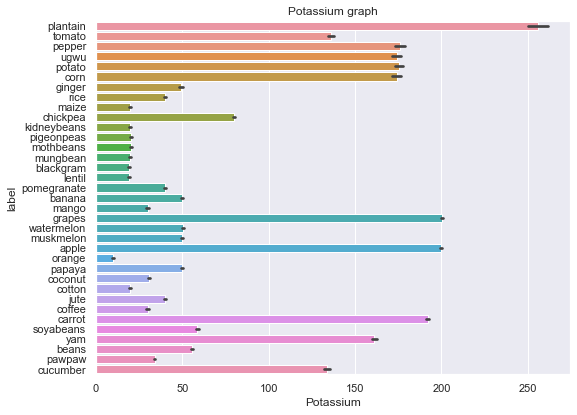

In [65]:
sns.barplot(data=data, x='Potassium',y='label')
sns.set(rc={'figure.figsize':(8.5,6.5)})
plt.title('Potassium graph')

Text(0.5, 1.0, 'Temperature graph')

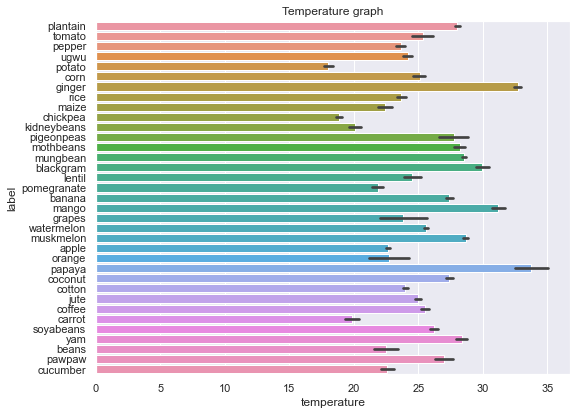

In [66]:
sns.barplot(data=data, x='temperature',y='label')
sns.set(rc={'figure.figsize':(8.5,6.5)})
plt.title('Temperature graph')

Text(0.5, 1.0, 'Humidity graph')

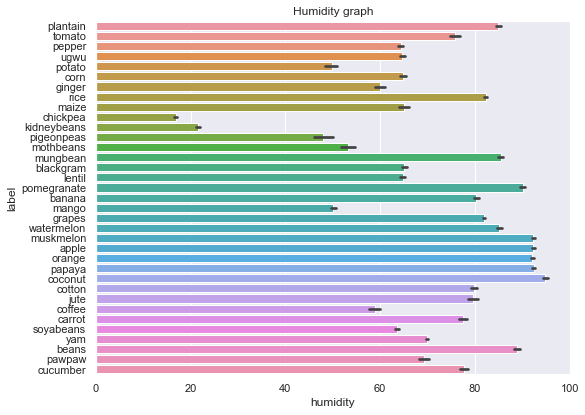

In [67]:
sns.barplot(data=data, x='humidity',y='label')
sns.set(rc={'figure.figsize':(8.5,6.5)})
plt.title('Humidity graph')

Text(0.5, 1.0, 'Rainfall graph')

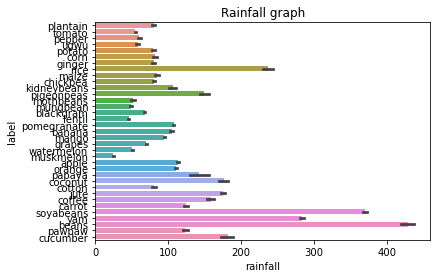

In [22]:
sns.barplot(data=data, x='rainfall',y='label')
plt.title('Rainfall graph')

In Nigeria, there are two seasons: Dry season and rainy season

Rainy season lasts from April till October, with high rainfall, and high humidity.

Dry season lasts from November till March, with low rainfall, and low humidity.

crops grown during each season

In [68]:
# this is indicate the type of crop to plant during a particular season in Nigeria
print("Dry season Crops")
print(data[(data['rainfall'] <80) & (data['humidity'] < 50)]['label'].unique())
print("...........................................")

print("Rainy season Crops")
print(data[(data['rainfall'] > 90) & (data['humidity'] > 60)]['label'].unique())

Dry season Crops
['potato' 'chickpea' 'kidneybeans' 'mothbeans']
...........................................
Rainy season Crops
['plantain' 'corn' 'ginger' 'rice' 'maize' 'pigeonpeas' 'pomegranate'
 'banana' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee'
 'carrot' 'soyabeans' 'yam' 'beans' 'pawpaw' 'cucumber']


## buidilng 3 different ML models

In [24]:
# splitting data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [25]:
y=data['label']
x=data.drop('label',axis=1)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.2)

## 1st model: Logistic Regression (lr)

In [26]:
lr_pipe= Pipeline([('ss',StandardScaler()),('lr',LogisticRegression())])

In [27]:
parameters = [{'lr__solver':[ 'newton-cg'],
                'lr__penalty':['l2'], 
                  'lr__C':[40]}]

In [28]:
lr_test=GridSearchCV(lr_pipe, param_grid = parameters, scoring = 'accuracy',cv = 5,refit=True)

In [29]:
lr_test.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid=[{'lr__C': [40], 'lr__penalty': ['l2'],
                          'lr__solver': ['newton-cg']}],
             scoring='accuracy')

In [30]:
lr_test.best_params_

{'lr__C': 40, 'lr__penalty': 'l2', 'lr__solver': 'newton-cg'}

In [31]:
lr_test.score(x_test,y_test)

0.9671428571428572

In [32]:
lr_pred=lr_test.predict(x_test)
lr_cm=classification_report(y_test,lr_pred)
print(lr_cm)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        21
       beans       1.00      1.00      1.00        22
   blackgram       0.92      1.00      0.96        24
      carrot       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        24
      coffee       0.94      1.00      0.97        17
        corn       1.00      1.00      1.00        23
      cotton       1.00      1.00      1.00        24
    cucumber       1.00      1.00      1.00        15
      ginger       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        23
        jute       1.00      0.86      0.92        21
 kidneybeans       1.00      1.00      1.00        21
      lentil       0.95      0.90      0.92        20
       maize       1.00      1.00      1.00        25
       mango       1.00    

## 2nd model randomforestclassifier rfc

In [33]:
rfc_pipe = Pipeline([( "ss" , StandardScaler()),
                       ("rfc",RandomForestClassifier())])

In [34]:
parameters = {
  'rfc__n_estimators':[100],
  'rfc__min_samples_split': [2]
  }

In [35]:
gs_rfc = GridSearchCV(rfc_pipe,parameters,verbose=1,refit=True)

In [36]:
gs_rfc.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__min_samples_split': [2],
                         'rfc__n_estimators': [100]},
             verbose=1)

In [37]:
gs_rfc.best_params_

{'rfc__min_samples_split': 2, 'rfc__n_estimators': 100}

In [38]:
gs_rfc.score(x_test,y_test)

0.99

In [39]:
rfc_pred=gs_rfc.predict(x_test)

In [40]:
rfc_cm=classification_report(y_test,rfc_pred)
print(rfc_cm)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        21
       beans       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        24
      carrot       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        17
        corn       1.00      1.00      1.00        23
      cotton       1.00      1.00      1.00        24
    cucumber       1.00      1.00      1.00        15
      ginger       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        23
        jute       1.00      1.00      1.00        21
 kidneybeans       1.00      1.00      1.00        21
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        25
       mango       1.00    

## 3rd model: knn

In [41]:
knn_pipe = Pipeline([('ss', StandardScaler()),
                     ('knn', KNeighborsClassifier())])

params = [{'knn__n_neighbors': [3, 4, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

In [42]:
gs_knn.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__leaf_size': [15, 20],
                          'knn__n_neighbors': [3, 4, 5, 7, 9],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [43]:
gs_knn.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [44]:
gs_knn.score(x_test,y_test)

0.9628571428571429

In [45]:
knn_pred=gs_knn.predict(x_test)
knn_cm=classification_report(y_test,knn_pred)
print(knn_cm)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        21
       beans       1.00      1.00      1.00        22
   blackgram       0.77      0.96      0.85        24
      carrot       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        24
      coffee       0.94      1.00      0.97        17
        corn       1.00      1.00      1.00        23
      cotton       0.96      1.00      0.98        24
    cucumber       1.00      1.00      1.00        15
      ginger       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        23
        jute       0.95      0.95      0.95        21
 kidneybeans       0.95      1.00      0.98        21
      lentil       0.88      0.70      0.78        20
       maize       1.00      0.96      0.98        25
       mango       0.96    

In [69]:
# from the models above, I would use the 'RandomForestClassifier' it had a higher performance compared to the other models.

## test

In [46]:
prediction = gs_knn.predict((np.array([[286, 162, 17, 25, 80, 300, 6]])))
print("The Suggested Crop for given climatic condition is :",prediction)

The Suggested Crop for given climatic condition is : ['mothbeans']
